<a href="https://colab.research.google.com/github/tosincarik/Machine-Learning-Model--Classification/blob/main/ThyroidProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Thyroid Dataset**

This data set contains 13 clinicopathologic features aiming to predict recurrence of well differentiated thyroid cancer. The data set was collected in duration of 15 years and each patient was followed for at least 10 years.

**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
#pd.set_option('max_columns',200) - To dipslay up to 200 Columns

**Importing the dataset**

In [2]:
df = pd.read_csv('Thyroid_Diff.csv')

**Exploratory Data Analysis**

Cleaning and Preprocessing

In [5]:
df.head() #View the top 5 data and examine the features for domanin knowledge

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [6]:
df.shape
# dataset has 383 rows and 17 columns

(383, 17)

In [7]:
df.info() #View the data types and check if there are null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [9]:
df=df.rename(columns={'T':'Tumor Classification', 'N': 'Nodal classification', 'M':'Metastasis classification', 'Hx Smoking': 'Smoking History'
, 'Hx Radiothreapy': 'Radiotheraphy History'})
#Rename the columns into understandable context

In [10]:
df.duplicated().sum()
## duplicated shows that there are 19 duplicates in the data

19

In [11]:
df=df.drop_duplicates().copy()
#dropping duplicate rows in the dataset

In [12]:
df.shape
#Now we have 364 rows and 17 columns in the dataset

(364, 17)

In [14]:
df.tail(10) #A quick check at the indexes shows a mismatch after dropping duplicates

,Age,Gender,Smoking,Smoking History,Radiotheraphy History,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,Tumor Classification,Nodal classification,Metastasis classification,Stage,Response,Recurred
373,31,M,Yes,No,Yes,Euthyroid,Single nodular goiter-left,Extensive,Papillary,Multi-Focal,High,T4a,N1b,M1,II,Structural Incomplete,Yes
374,62,M,Yes,No,No,Euthyroid,Single nodular goiter-left,Left,Papillary,Multi-Focal,High,T4a,N1b,M1,IVB,Structural Incomplete,Yes
375,59,F,No,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,IVB,Structural Incomplete,Yes
376,40,M,Yes,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,I,Structural Incomplete,Yes
377,46,M,Yes,No,No,Euthyroid,Single nodular goiter-left,Bilateral,Follicular,Uni-Focal,High,T4b,N1b,M1,II,Structural Incomplete,Yes
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes
382,67,M,Yes,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


**Feature Exploration**

In [15]:
df.reset_index(drop=True)
#Resetting the indexes

,Age,Gender,Smoking,Smoking History,Radiotheraphy History,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,Tumor Classification,Nodal classification,Metastasis classification,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
360,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
361,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
362,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [ ]:
df.nunique()
#A view into the unique features of each column for a stronger exploration of the features

Age                          65
Gender                        2
Smoking                       2
Smoking History               2
Radiotheraphy History         2
Thyroid Function              5
Physical Examination          5
Adenopathy                    6
Pathology                     4
Focality                      2
Risk                          3
Tumor Classification          7
Nodal classification          3
Metastasis classification     2
Stage                         5
Response                      4
Recurred                      2
dtype: int64

**EDA - Univariate Analysis**

Text(0, 0.5, 'Count')

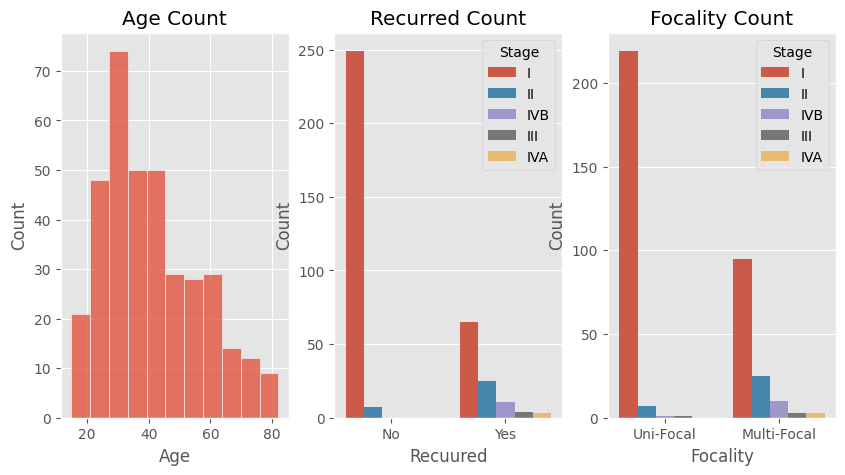

In [17]:
import seaborn as sns
fig, axes = plt.subplots(1,3, figsize=(10,5))

sns.histplot(data = df, x='Age', ax=axes[0])
axes[0].set_title('Age Count')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

sns.countplot(data = df, x='Recurred', hue='Stage', ax=axes[1])
axes[1].set_title('Recurred Count')
axes[1].set_xlabel('Recuured')
axes[1].set_ylabel('Count')

sns.countplot(data = df, x='Focality', hue='Stage', ax=axes[2])
axes[2].set_title('Focality Count')
axes[2].set_xlabel('Focality')
axes[2].set_ylabel('Count')




Text(0, 0.5, 'Risk')

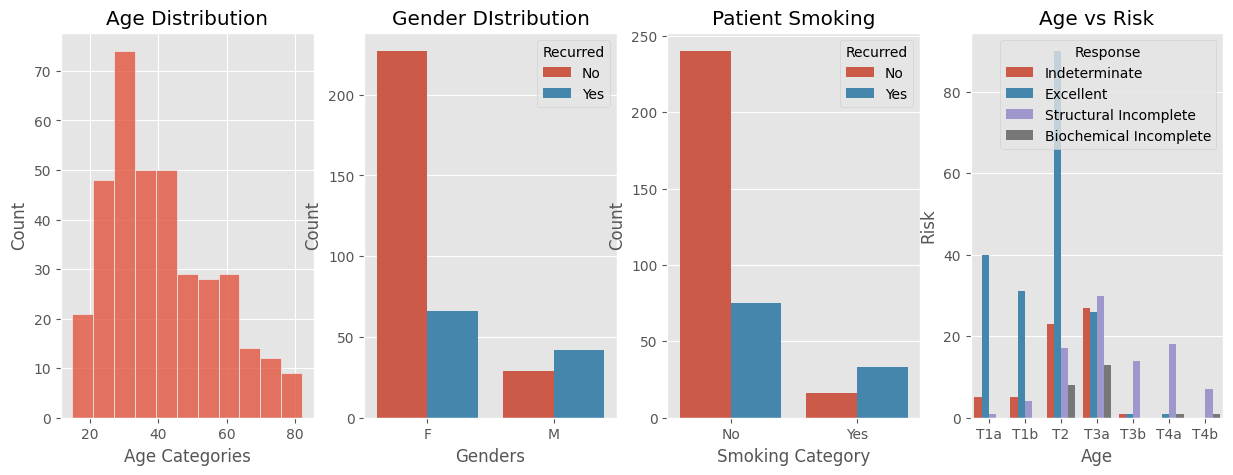

In [18]:
fig, axes = plt.subplots(1,4, figsize=(15,5))

#sns.histplot(data = df, x='Age', ax=axes[0])
sns.histplot(data=df, x='Age', ax=axes[0])
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age Categories')
axes[0].set_ylabel('Count')

sns.countplot(data=df, x='Gender', ax=axes[1], hue='Recurred')
axes[1].set_title('Gender DIstribution')
axes[1].set_xlabel('Genders')
axes[1].set_ylabel('Count')

sns.countplot(data=df, x='Smoking', ax=axes[2], hue='Recurred')
axes[2].set_title('Patient Smoking')
axes[2].set_xlabel('Smoking Category')
axes[2].set_ylabel('Count')

sns.countplot(data=df, x='Tumor Classification', hue='Response', ax=axes[3])
axes[3].set_title('Age vs Risk')
axes[3].set_xlabel('Age')
axes[3].set_ylabel('Risk')



#sns.countplot(data=df, x='Smoking History', ax=axes[3], hue='Recurred')
#axes[3].set_title('Smoking History DIstribution')
#axes[3].set_xlabel('Smoking Categories')
#axes[3].set_ylabel('Count')


**Encoding Categorical Data**

In [20]:
columns_onehot = df[['Thyroid Function','Physical Examination','Adenopathy', 'Pathology','Response']]

columns_label = df[['Age','Gender','Smoking History','Focality','Tumor Classification','Nodal classification','Metastasis classification','Radiotheraphy History','Risk','Stage','Recurred']]

In [21]:
#columns_label, columns_onehot

(     Age Gender Smoking History     Focality Tumor Classification  \
 0     27      F              No    Uni-Focal                  T1a   
 1     34      F             Yes    Uni-Focal                  T1a   
 2     30      F              No    Uni-Focal                  T1a   
 3     62      F              No    Uni-Focal                  T1a   
 4     62      F              No  Multi-Focal                  T1a   
 ..   ...    ...             ...          ...                  ...   
 378   72      M             Yes    Uni-Focal                  T4b   
 379   81      M              No  Multi-Focal                  T4b   
 380   72      M             Yes  Multi-Focal                  T4b   
 381   61      M             Yes  Multi-Focal                  T4b   
 382   67      M              No  Multi-Focal                  T4b   
 
     Nodal classification Metastasis classification Radiotheraphy History  \
 0                     N0                        M0                    No   
 1  

**Importing the libraries for encoding categorical data (Nominal and Ordinal) and perfrom encoding**



In [22]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
#Create the encoders - OneHotencoding for Nominal data and LabelEncoder for ordianl data that has numerical ordering and significance
encoder = OneHotEncoder(sparse=False, drop='first')
le = LabelEncoder()

In [24]:
#Apply the encoders to the categorical features (Nominal data)
one_hot_encoded = pd.DataFrame(encoder.fit_transform(columns_onehot),
                               columns=encoder.get_feature_names_out(columns_onehot.columns))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [26]:
one_hot_encoded #A new onehotencoded features
one_hot_encoded.reset_index(drop=True) #resetting index

,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,Physical Examination_Multinodular goiter,Physical Examination_Normal,Physical Examination_Single nodular goiter-left,Physical Examination_Single nodular goiter-right,Adenopathy_Extensive,Adenopathy_Left,Adenopathy_No,Adenopathy_Posterior,Adenopathy_Right,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
360,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
361,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
362,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [27]:
#Apply labelencoder to ordinal data
label_encoded = columns_label.apply(le.fit_transform)

In [28]:
label_encoded.reset_index(drop=True, inplace=True) #resetting index
#label_encoded

,Age,Gender,Smoking History,Focality,Tumor Classification,Nodal classification,Metastasis classification,Radiotheraphy History,Risk,Stage,Recurred
0,11,0,0,1,0,0,0,0,2,0,0
1,18,0,1,1,0,0,0,0,2,0,0
2,14,0,0,1,0,0,0,0,2,0,0
3,46,0,0,1,0,0,0,0,2,0,0
4,46,0,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
359,56,1,1,1,6,2,1,1,0,4,1
360,63,1,0,0,6,2,1,1,0,4,1
361,56,1,1,0,6,2,1,0,0,4,1
362,45,1,1,0,6,2,0,1,0,3,1


In [29]:
#Concatenate the two seperated dataframe into one dataframe for further analysis
df = pd.concat([one_hot_encoded,label_encoded],axis=1)

In [30]:
#Create the independent variable into X and dependent variable into Y
X = df.drop(columns='Recurred').reset_index(drop=True)
y = df['Recurred']

In [55]:
#A look at a correlation that each features share with each othet and the dependent variable
df.corr()

,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,Physical Examination_Multinodular goiter,Physical Examination_Normal,Physical Examination_Single nodular goiter-left,Physical Examination_Single nodular goiter-right,Adenopathy_Extensive,Adenopathy_Left,Adenopathy_No,Adenopathy_Posterior,Adenopathy_Right,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete,Age,Gender,Smoking History,Focality,Tumor Classification,Nodal classification,Metastasis classification,Radiotheraphy History,Risk,Stage,Recurred
Thyroid Function_Clinical Hypothyroidism,1.000000,-0.457411,-0.021790,-0.036927,-0.014351,-2.585438e-02,-0.068320,0.090816,-0.025854,-0.040868,0.050614,-0.013724,-0.026486,0.090524,0.024143,-0.032953,0.054485,-0.000453,-0.071067,-0.028829,-0.052059,0.004442,0.015378,-0.044218,-6.826142e-02,-0.042113,-0.025854,0.058432,-0.059705,-0.052560
Thyroid Function_Euthyroid,-0.457411,1.000000,-0.292365,-0.495470,-0.017781,-1.163716e-01,0.080039,0.046397,-0.058740,0.051835,-0.067101,0.030004,0.063751,-0.076338,-0.088851,0.108337,-0.071591,-0.030797,0.086823,-0.018675,-0.040992,-0.121095,-0.000899,0.042737,5.592226e-02,0.019056,-0.058740,-0.015296,-0.049784,0.088918
Thyroid Function_Subclinical Hyperthyroidism,-0.021790,-0.292365,1.000000,-0.023603,-0.041749,-1.652543e-02,-0.011510,0.062174,-0.016525,-0.026121,0.075645,-0.008772,-0.045995,0.075124,0.027383,-0.039102,0.113560,-0.052952,-0.068136,-0.090300,0.001473,0.054509,0.042356,-0.107958,-7.756598e-02,-0.026918,-0.016525,0.082664,-0.038162,-0.076653
Thyroid Function_Subclinical Hypothyroidism,-0.036927,-0.495470,-0.023603,1.000000,0.023887,1.800360e-01,0.020533,-0.086460,0.076015,-0.044268,-0.060470,-0.014866,0.006496,-0.048224,0.011685,0.018897,-0.064883,0.063258,0.016496,0.098177,0.081812,0.103098,-0.081776,0.080144,8.215680e-02,0.020274,-0.028006,-0.101270,0.116133,0.026462
Physical Examination_Multinodular goiter,-0.014351,-0.017781,-0.041749,0.023887,1.000000,-1.075138e-01,-0.433547,-0.562052,0.099550,-0.089082,-0.133783,0.019869,-0.030294,-0.035381,-0.046473,0.071615,-0.171844,0.066642,0.121494,0.105009,0.081349,0.055822,-0.347529,0.164922,1.756899e-01,-0.017729,0.016724,-0.222179,0.118830,0.148721
Physical Examination_Normal,-0.025854,-0.116372,-0.016525,0.180036,-0.107514,1.000000e+00,-0.079068,-0.102504,0.126050,-0.030994,-0.042337,-0.010408,0.004548,-0.033764,0.068955,-0.055569,-0.025408,-0.009270,0.011549,-0.074421,-0.068930,0.034648,0.066797,-0.083885,2.570423e-17,-0.031938,-0.019608,0.036633,-0.045280,-0.003369
Physical Examination_Single nodular goiter-left,-0.068320,0.080039,-0.011510,0.020533,-0.433547,-7.906817e-02,1.000000,-0.413347,-0.032346,0.300758,0.037094,0.044832,-0.163178,0.089117,-0.017138,-0.095872,-0.021734,0.021522,0.014818,0.002688,0.078299,-0.090763,0.051452,0.050698,-6.115129e-02,0.137572,0.014376,0.040721,0.004194,-0.001544
Physical Examination_Single nodular goiter-right,0.090816,0.046397,0.062174,-0.086460,-0.562052,-1.025044e-01,-0.413347,1.000000,-0.102504,-0.162027,0.088601,-0.054411,0.191699,-0.050034,0.005244,0.058782,0.173714,-0.081530,-0.116475,-0.079637,-0.113056,0.026623,0.255580,-0.151604,-9.660457e-02,-0.087208,-0.018564,0.149773,-0.098104,-0.122160
Adenopathy_Extensive,-0.025854,-0.058740,-0.016525,0.076015,0.099550,1.260504e-01,-0.032346,-0.102504,1.000000,-0.030994,-0.218460,-0.010408,-0.054575,0.054022,-0.052593,0.036164,-0.145521,-0.062829,0.242536,0.040370,0.133006,0.034648,-0.139956,0.196109,2.300851e-01,0.152595,0.417367,-0.239890,0.182580,0.215587
Adenopathy_Left,-0.040868,0.051835,-0.026121,-0.044268,-0.089082,-3.099379e-02,0.300758,-0.162027,-0.030994,1.000000,-0.345316,-0.016452,-0.086265,0.003767,-0.083132,0.099810,-0.151845,0.005267,0.202962,-0.038138,0.022477,-0.063895,-0.044363,0.152411,2.888139e-01,0.129676,-0.030994,-0.184925,0.027298,0

**Splitting the dataset into training and test sets**

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=1)

In [61]:
X_train

,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,Physical Examination_Multinodular goiter,Physical Examination_Normal,Physical Examination_Single nodular goiter-left,Physical Examination_Single nodular goiter-right,Adenopathy_Extensive,Adenopathy_Left,Adenopathy_No,Adenopathy_Posterior,Adenopathy_Right,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete,Age,Gender,Smoking History,Focality,Tumor Classification,Nodal classification,Metastasis classification,Radiotheraphy History,Risk,Stage
58,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,19,0,0,1,1,0,0,0,2,0
159,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,14,0,0,1,2,0,0,0,2,0
244,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,25,0,0,0,3,0,0,0,2,0
213,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,15,0,0,1,2,2,0,0,1,0
150,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,11,0,0,1,2,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,19,0,0,1,2,0,0,0,2,0
255,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,12,1,0,1,3,0,0,0,2,0
72,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,19,0,0,1,1,0,0,0,2,0
235,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,15,1,1,1,3,0,0,0,2,0


In [62]:
y_train

58     0
159    0
244    0
213    1
150    0
      ..
203    0
255    0
72     0
235    0
37     0
Name: Recurred, Length: 273, dtype: int64

In [74]:
#importing the machine learning models libraries
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [78]:
models = {'Regressor' : LogisticRegression(max_iter=10000),
'Neighbors' : KNeighborsClassifier(),
'SVC' : SVC(),
'RFC' : RandomForestClassifier(),
'DTC' : DecisionTreeClassifier(),
'Gradient Boosting': GradientBoostingClassifier()
}

**Training the multiple models and applying cross validation**

In [79]:
results= {}
for model, models in models.items():
  cvs_scores = cross_val_score(models,X_train, y_train, cv=5, scoring='accuracy')
  results[model]= cvs_scores.mean()

In [80]:
# Display cross-validation results
print("Cross-validation results:")
for model_name, score in results.items():
    print(f"{model_name}: {score:.4f}")

Cross-validation results:
Regressor: 0.9413
Neighbors: 0.8718
SVC: 0.7690
RFC: 0.9560
DTC: 0.9265
Gradient Boosting: 0.9560


The best model for this data is a gradient boosting with a mean accuracy score of 0.9560